In [3]:
from pybliometrics.scopus import ScopusSearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
import pybliometrics
pybliometrics.scopus.utils.create_config()

ModuleNotFoundError: No module named 'pybliometrics'

In [5]:
from pybliometrics.scopus.utils import config

print("keys : ", config['Authentication']['APIKey'])  # Show keys

keys :  1e634063406e6b444b503e8eedf16350, 5a6abf59175949d8c948473454822a57


In [36]:
# liste laboratoires INS2I
lab = ("CMP", "CRAN", "CREATIS", "CRIL","CRISTAL","DI ENS","ETIS","GIPSA-Lab","GREYC","G-SCOP","HEUDIASYC","I3S","ICUBE","IDRIS","IRIF","IRISA","IRIT","L2S","LAAS","LABRI","LAB-STICC","LAMIH","LAMSADE","LIG","LIGM","LIMOS","LIP","LIP6","LIPN","LIRIS","LIRMM","LIS","LISN","LIX","LORIA","LS2N","LSV","STMS","TIMA","TIMC IMAG","VERIMAG")
print(len(lab))

38


In [13]:
# liste laboratoires INS2I
lab = ("LIS","LIF","LSIS")
print(len(lab))

3


In [10]:
# liste laboratoires INS2I avec affiliation ID
labID = (("CMP",60202650),("CRAN", 60073336),("CREATIS", 60062760),("CRIL", 60122762),("CRISTAL",60122064),("DI ENS", 60105786),("ETIS",60126116),("GIPSA-Lab",60104170),("GREYC",60122535),("G-SCOP",60108255),("HEUDIASYC",60160765),("I3S",60110719),("ICUBE",60208831),("IDRIS",60106146),("IRIF",60123660),("IRISA",60027031),("IRIT",60030491),("L2S",60007136),("LAAS",60005830),("LABRI",60106845),("LAB-STICC",60105670),("LAMIH",60193405),("LAMSADE",60105740),("LIG",60108044),("LIGM",60105097),("LIMOS",60121963),("LIP",60111070),("LIP6",60112307),("LIPN",60101355),("LIRIS",60108341),("LIRMM",60007853),("LIS",60210090),("LIMSI",60032709),("LRI",60106208),("LIX",60028952),("LORIA",60028850),("LS2N",60110511),("LSV",60105997),("STMS",60158039),("TIMA",60003462),("TIMC IMAG",60108275),("VERIMAG",60030409))
print(len(labID))
labID

42


(('CMP', 60202650),
 ('CRAN', 60073336),
 ('CREATIS', 60062760),
 ('CRIL', 60122762),
 ('CRISTAL', 60122064),
 ('DI ENS', 60105786),
 ('ETIS', 60126116),
 ('GIPSA-Lab', 60104170),
 ('GREYC', 60122535),
 ('G-SCOP', 60108255),
 ('HEUDIASYC', 60160765),
 ('I3S', 60110719),
 ('ICUBE', 60208831),
 ('IDRIS', 60106146),
 ('IRIF', 60123660),
 ('IRISA', 60027031),
 ('IRIT', 60030491),
 ('L2S', 60007136),
 ('LAAS', 60005830),
 ('LABRI', 60106845),
 ('LAB-STICC', 60105670),
 ('LAMIH', 60193405),
 ('LAMSADE', 60105740),
 ('LIG', 60108044),
 ('LIGM', 60105097),
 ('LIMOS', 60121963),
 ('LIP', 60111070),
 ('LIP6', 60112307),
 ('LIPN', 60101355),
 ('LIRIS', 60108341),
 ('LIRMM', 60007853),
 ('LIS', 60210090),
 ('LIMSI', 60032709),
 ('LRI', 60106208),
 ('LIX', 60028952),
 ('LORIA', 60028850),
 ('LS2N', 60110511),
 ('LSV', 60105997),
 ('STMS', 60158039),
 ('TIMA', 60003462),
 ('TIMC IMAG', 60108275),
 ('VERIMAG', 60030409))

In [14]:
#Interrogation par AFFILORG
total = 0
for i in range(len(lab)):
    query='AFFILORG("'+lab[i]+'") AND PUBYEAR > 2015 AND PUBYEAR < 2021'
    li = ScopusSearch(query, verbose=True, download=True, subscriber=False)
    print(lab[i], ": Total : ", li.get_results_size())
    total += li.get_results_size()
    #print(li.results)
    df = pd.DataFrame(pd.DataFrame(li.results))
    print(df.groupby('subtypeDescription')['eid'].nunique())
print ("Total labo = ", total)


100%|██████████| 44/44 [00:41<00:00,  1.06it/s]


LIS : Total :  1052
subtypeDescription
Article             584
Book                  3
Book Chapter         38
Conference Paper    380
Editorial            17
Erratum               3
Letter                6
Note                  7
Review               14
Name: eid, dtype: int64



100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


LIF : Total :  214
subtypeDescription
Article             103
Book                  1
Book Chapter          7
Conference Paper     98
Editorial             1
Letter                2
Review                2
Name: eid, dtype: int64



100%|██████████| 26/26 [00:27<00:00,  1.05s/it]

LSIS : Total :  608
subtypeDescription
Article             233
Book                  1
Book Chapter         17
Conference Paper    344
Editorial             4
Erratum               2
Review                6
Name: eid, dtype: int64
Total labo =  1874


## Récupération des listes de publications de chaque laboratoire
L'interrogation se fait selon l'identifiant d'affiliation (AF-ID).
Pour chaque laboratoire un fichier .csv est créé

In [43]:
#Interrogation par AF-ID
total = 0
for labo in labID:
    print(labo)
    query='AF-ID('+str(labo[1])+') AND PUBYEAR > 2015 AND PUBYEAR < 2021'
    #print (query)
    li = ScopusSearch(query, verbose=True, download=True, subscriber=False)
    print(labo[0], ": Total : ", li.get_results_size())
    total += li.get_results_size()
    #print(li.results)
    df = pd.DataFrame(pd.DataFrame(li.results))
    df.to_csv("Scopus/"+labo[0]+'.csv')
    print(df.groupby('subtypeDescription')['eid'].nunique())
print ("Total labo = ", total)

('CMP', 60202650)
CMP : Total :  47
subtypeDescription
Article             35
Book Chapter         1
Conference Paper    10
Review               1
Name: eid, dtype: int64
('CRAN', 60073336)
CRAN : Total :  1303
subtypeDescription
Article             607
Book                  2
Book Chapter         49
Conference Paper    548
Editorial            22
Erratum               6
Letter                7
Note                  4
Review               52
Short Survey          6
Name: eid, dtype: int64
('CREATIS', 60062760)
CREATIS : Total :  869
subtypeDescription
Article             524
Book Chapter          7
Conference Paper    273
Editorial             8
Erratum               3
Letter               14
Note                  3
Retracted             3
Review               24
Short Survey         10
Name: eid, dtype: int64
('CRIL', 60122762)


100%|██████████| 14/14 [00:10<00:00,  1.28it/s]


CRIL : Total :  322
subtypeDescription
Article              51
Book                  1
Book Chapter          2
Conference Paper    260
Editorial             6
Review                2
Name: eid, dtype: int64
('CRISTAL', 60122064)


100%|██████████| 65/65 [01:05<00:00,  1.01s/it]


CRISTAL : Total :  1583
subtypeDescription
Article             630
Book Chapter         41
Conference Paper    863
Data Paper            1
Editorial            17
Erratum               3
Letter                2
Note                  4
Retracted             1
Review               12
Short Survey          9
Name: eid, dtype: int64
('DI ENS', 60105786)


100%|██████████| 11/11 [00:09<00:00,  1.13it/s]


DI ENS : Total :  242
subtypeDescription
Article              82
Book Chapter          1
Conference Paper    151
Editorial             4
Erratum               3
Review                1
Name: eid, dtype: int64
('ETIS', 60126116)


100%|██████████| 19/19 [00:17<00:00,  1.07it/s]


ETIS : Total :  432
subtypeDescription
Article             152
Book Chapter          4
Conference Paper    267
Editorial             3
Erratum               1
Note                  1
Review                4
Name: eid, dtype: int64
('GIPSA-Lab', 60104170)


100%|██████████| 69/69 [01:03<00:00,  1.08it/s]


GIPSA-Lab : Total :  1692
subtypeDescription
Article             764
Book                  1
Book Chapter         64
Conference Paper    822
Editorial            13
Erratum               2
Letter                2
Note                  3
Review               18
Short Survey          3
Name: eid, dtype: int64
('GREYC', 60122535)


100%|██████████| 23/23 [00:20<00:00,  1.14it/s]


GREYC : Total :  546
subtypeDescription
Article             229
Book Chapter          8
Conference Paper    297
Editorial             8
Erratum               1
Note                  1
Review                1
Name: eid, dtype: int64
('G-SCOP', 60108255)


100%|██████████| 22/22 [00:18<00:00,  1.19it/s]


G-SCOP : Total :  516
subtypeDescription
Article             252
Book Chapter          8
Conference Paper    245
Editorial             1
Erratum               4
Review                6
Name: eid, dtype: int64
('HEUDIASYC', 60160765)


100%|██████████| 28/28 [00:22<00:00,  1.23it/s]


HEUDIASYC : Total :  652
subtypeDescription
Article             251
Book                  1
Book Chapter         13
Conference Paper    371
Editorial             6
Review               10
Name: eid, dtype: int64
('I3S', 60110719)


100%|██████████| 37/37 [00:33<00:00,  1.10it/s]


I3S : Total :  878
subtypeDescription
Article             292
Book                  2
Book Chapter         12
Conference Paper    540
Editorial            25
Erratum               3
Review                4
Name: eid, dtype: int64
('ICUBE', 60208831)


100%|██████████| 56/56 [00:55<00:00,  1.01it/s]


ICUBE : Total :  1357
subtypeDescription
Article             834
Book                  1
Book Chapter         18
Conference Paper    412
Editorial            12
Erratum               6
Letter               10
Note                  6
Review               42
Short Survey         16
Name: eid, dtype: int64
('IDRIS', 60106146)


100%|██████████| 2/2 [00:00<00:00,  3.78it/s]


IDRIS : Total :  8
subtypeDescription
Article             5
Conference Paper    2
Review              1
Name: eid, dtype: int64
('IRIF', 60123660)


100%|██████████| 32/32 [00:26<00:00,  1.19it/s]


IRIF : Total :  768
subtypeDescription
Article             356
Book Chapter          9
Conference Paper    391
Editorial             6
Note                  1
Review                5
Name: eid, dtype: int64
('IRISA', 60027031)


100%|██████████| 103/103 [01:38<00:00,  1.05it/s]


IRISA : Total :  2533
subtypeDescription
Article              779
Book                   3
Book Chapter          63
Conference Paper    1581
Data Paper             2
Editorial             78
Erratum                3
Letter                 1
Note                   2
Review                19
Short Survey           1
Name: eid, dtype: int64
('IRIT', 60030491)


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


IRIT : Total :  2458
subtypeDescription
Article              724
Book                   1
Book Chapter          49
Conference Paper    1599
Editorial             50
Erratum                2
Letter                 2
Review                28
Short Survey           3
Name: eid, dtype: int64
('L2S', 60007136)


100%|██████████| 76/76 [01:08<00:00,  1.12it/s]


L2S : Total :  1853
subtypeDescription
Article             797
Book Chapter         27
Conference Paper    996
Data Paper            2
Editorial            16
Erratum               1
Review               14
Name: eid, dtype: int64
('LAAS', 60005830)


100%|██████████| 94/94 [01:24<00:00,  1.12it/s]


LAAS : Total :  2313
subtypeDescription
Article             1012
Book                   3
Book Chapter          58
Conference Paper    1145
Editorial             57
Erratum                2
Review                34
Short Survey           1
Name: eid, dtype: int64
('LABRI', 60106845)


100%|██████████| 52/52 [00:48<00:00,  1.06it/s]


LABRI : Total :  1257
subtypeDescription
Article             512
Book                  3
Book Chapter         41
Conference Paper    658
Editorial            17
Erratum               3
Letter                3
Note                  1
Review               18
Name: eid, dtype: int64
('LAB-STICC', 60105670)


100%|██████████| 71/71 [01:05<00:00,  1.09it/s]


LAB-STICC : Total :  1735
subtypeDescription
Article              665
Book                   1
Book Chapter          20
Conference Paper    1008
Data Paper             3
Editorial             13
Erratum                3
Letter                 2
Note                   3
Review                16
Name: eid, dtype: int64
('LAMIH', 60193405)


100%|██████████| 47/47 [00:41<00:00,  1.13it/s]


LAMIH : Total :  1137
subtypeDescription
Article             585
Book Chapter         36
Conference Paper    462
Editorial            21
Erratum               2
Letter                6
Note                  2
Review               20
Short Survey          2
Name: eid, dtype: int64
('LAMSADE', 60105740)


100%|██████████| 25/25 [00:20<00:00,  1.20it/s]


LAMSADE : Total :  576
subtypeDescription
Article             262
Book                  2
Book Chapter         16
Conference Paper    272
Editorial            14
Note                  4
Review                5
Short Survey          1
Name: eid, dtype: int64
('LIG', 60108044)


100%|██████████| 51/51 [01:01<00:00,  1.21s/it]


LIG : Total :  1239
subtypeDescription
Article             303
Book Chapter         23
Conference Paper    876
Editorial            26
Erratum               1
Review               10
Name: eid, dtype: int64
('LIGM', 60105097)


100%|██████████| 33/33 [00:29<00:00,  1.13it/s]


LIGM : Total :  778
subtypeDescription
Article             312
Book                  1
Book Chapter         18
Conference Paper    434
Editorial             9
Review                3
Name: eid, dtype: int64
('LIMOS', 60121963)


100%|██████████| 25/25 [00:20<00:00,  1.24it/s]


LIMOS : Total :  576
subtypeDescription
Article             265
Book                  1
Book Chapter         13
Conference Paper    284
Editorial             4
Review                9
Name: eid, dtype: int64
('LIP', 60111070)


100%|██████████| 6/6 [00:04<00:00,  1.35it/s]


LIP : Total :  111
subtypeDescription
Article             31
Book Chapter         1
Conference Paper    75
Review               3
Short Survey         1
Name: eid, dtype: int64
('LIP6', 60112307)


100%|██████████| 79/79 [01:14<00:00,  1.07it/s]


LIP6 : Total :  1931
subtypeDescription
Article              624
Book Chapter          45
Conference Paper    1201
Editorial             40
Erratum                4
Note                   5
Review                10
Short Survey           1
Name: eid, dtype: int64
('LIPN', 60101355)


100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


LIPN : Total :  115
subtypeDescription
Article             53
Book Chapter         1
Conference Paper    57
Editorial            2
Review               2
Name: eid, dtype: int64
('LIRIS', 60108341)


100%|██████████| 44/44 [00:42<00:00,  1.02it/s]


LIRIS : Total :  1073
subtypeDescription
Article             377
Book Chapter         19
Conference Paper    631
Editorial            26
Erratum               4
Review               14
Name: eid, dtype: int64
('LIRMM', 60007853)


100%|██████████| 79/79 [01:15<00:00,  1.04it/s]


LIRMM : Total :  1932
subtypeDescription
Article             811
Book                  4
Book Chapter         52
Conference Paper    989
Data Paper            1
Editorial            46
Erratum               2
Letter                6
Note                  1
Review               17
Short Survey          2
Name: eid, dtype: int64
('LIS', 60210090)


100%|██████████| 55/55 [00:54<00:00,  1.00it/s]


LIS : Total :  1327
subtypeDescription
Article             547
Book                  2
Book Chapter         37
Conference Paper    722
Editorial             5
Erratum               3
Letter                2
Review                8
Name: eid, dtype: int64
('LIMSI', 60032709)


100%|██████████| 34/34 [00:29<00:00,  1.16it/s]


LIMSI : Total :  812
subtypeDescription
Article             347
Book                  1
Book Chapter         22
Conference Paper    407
Editorial            16
Letter                4
Review               13
Short Survey          2
Name: eid, dtype: int64
('LRI', 60106208)


100%|██████████| 37/37 [00:32<00:00,  1.14it/s]


LRI : Total :  883
subtypeDescription
Article             336
Book                  2
Book Chapter         11
Conference Paper    515
Editorial             7
Erratum               1
Review               10
Name: eid, dtype: int64
('LIX', 60028952)


100%|██████████| 31/31 [00:25<00:00,  1.21it/s]


LIX : Total :  748
subtypeDescription
Article             324
Book                  1
Book Chapter         38
Conference Paper    363
Editorial            13
Erratum               2
Note                  1
Review                6
Name: eid, dtype: int64
('LORIA', 60028850)


100%|██████████| 61/61 [01:00<00:00,  1.01it/s]


LORIA : Total :  1488
subtypeDescription
Article             472
Book                  3
Book Chapter         51
Conference Paper    897
Data Paper            1
Editorial            43
Erratum               2
Letter                1
Note                  1
Review               16
Short Survey          1
Name: eid, dtype: int64
('LS2N', 60110511)


100%|██████████| 80/80 [01:11<00:00,  1.12it/s]


LS2N : Total :  1975
subtypeDescription
Article              781
Book                   1
Book Chapter          71
Conference Paper    1063
Editorial             29
Erratum                2
Letter                 1
Retracted              1
Review                25
Short Survey           1
Name: eid, dtype: int64
('LSV', 60105997)


100%|██████████| 17/17 [00:14<00:00,  1.16it/s]


LSV : Total :  378
subtypeDescription
Article             119
Book Chapter         12
Conference Paper    236
Editorial             7
Erratum               2
Review                1
Name: eid, dtype: int64
('STMS', 60158039)


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


STMS : Total :  223
subtypeDescription
Article              94
Book Chapter          4
Conference Paper    116
Editorial             2
Letter                2
Review                5
Name: eid, dtype: int64
('TIMA', 60003462)


100%|██████████| 17/17 [00:13<00:00,  1.27it/s]


TIMA : Total :  399
subtypeDescription
Article             112
Book                  2
Book Chapter          8
Conference Paper    267
Editorial             7
Review                3
Name: eid, dtype: int64
('TIMC IMAG', 60108275)


100%|██████████| 37/37 [00:36<00:00,  1.03it/s]


TIMC IMAG : Total :  897
subtypeDescription
Article             677
Book                  1
Book Chapter         20
Conference Paper     69
Editorial             8
Erratum               2
Letter               46
Note                  8
Review               48
Short Survey         18
Name: eid, dtype: int64
('VERIMAG', 60030409)


100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

VERIMAG : Total :  324
subtypeDescription
Article             120
Book Chapter         14
Conference Paper    181
Editorial             5
Erratum               1
Letter                1
Review                2
Name: eid, dtype: int64
Total labo =  42286


In [8]:
def initStatsLabo ():
    npPublisLabo = list()
    for labo in labID:
        npPublisLabo.append({"nom":labo[0]})
    #print(npPublisLabo)
    global statsLabo
    statsLabo = pd.DataFrame(npPublisLabo)
    statsLabo.set_index('nom',inplace=True)
    statsLabo["Total"]=0
    statsLabo["Article"]=0
    statsLabo["Conference Paper"]=0
    statsLabo["Book"]=0
    statsLabo["Book Chapter"]=0
    statsLabo["Data Paper"]=0
    statsLabo["Editorial"]=0
    statsLabo["Erratum"]=0
    statsLabo["Letter"]=0
    statsLabo["Review"]=0
    statsLabo["Short Survey"]=0
    statsLabo["Note"]=0
    statsLabo["Retracted"]=0

In [9]:
initStatsLabo()
for labo in labID:
    df = pd.read_csv("Scopus/"+labo[0]+".csv")
    statsLabo.loc[labo[0],'Total'] = len(df)
    dataLabo = df.groupby('subtypeDescription')['eid'].count()
    for type in dataLabo.index:
        statsLabo.loc[labo[0],type]=dataLabo[type]
statsLabo

NameError: name 'labID' is not defined

In [11]:
statsParAnneeLabo = pd.DataFrame()
for labo in labID:
    df = pd.read_csv("Scopus/"+labo[0]+".csv")
    df.coverDate = pd.to_datetime(df.coverDate).dt.year
    anneeDebut = 2016
    anneeFin = 2020
    evolutionLabo = pd.DataFrame()
    for x in range(anneeDebut,anneeFin+1):
        data = {
            "Année" : [x],
            "Nom":labo[0],
            "Total" : [0],
            "Article" : [0],
            "Conference Paper" : [0],
            "Data Paper" : [0],
            "Book" : [0],
            "Book Chapter" : [0],
            "Editorial" : [0],
            "Erratum" : [0],
            "Letter" : [0],
            "Review" : [0],
            "Short Survey" : [0],
            "Note" : [0],
            "Retracted" : [0]
        }
        evolutionLabo = pd.concat([evolutionLabo, pd.DataFrame(data)], ignore_index=True)
    evolutionLabo.set_index(['Année'], inplace=True)
    dataLabo = df.groupby(['coverDate','subtypeDescription'])['coverDate'].count()
    for index, valeur in dataLabo.iteritems():
        evolutionLabo.loc[index[0],index[1]]=valeur
        evolutionLabo.loc[index[0],"Total"]+=valeur
    statsParAnneeLabo = pd.concat([statsParAnneeLabo, evolutionLabo])
display(statsParAnneeLabo)

,Nom,Total,Article,Conference Paper,Data Paper,Book,Book Chapter,Editorial,Erratum,Letter,Review,Short Survey,Note,Retracted
Année,,,,,,,,,,,,,,
2016,CMP,13,10,2,0,0,1,0,0,0,0,0,0,0
2017,CMP,16,10,6,0,0,0,0,0,0,0,0,0,0
2018,CMP,12,10,1,0,0,0,0,0,0,1,0,0,0
2019,CMP,3,2,1,0,0,0,0,0,0,0,0,0,0
2020,CMP,3,3,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,VERIMAG,105,44,56,0,0,2,1,0,1,1,0,0,0
2017,VERIMAG,68,32,32,0,0,4,0,0,0,0,0,0,0
2018,VERIMAG,61,16,38,0,0,4,3,0,0,0,0,0,0


In [94]:
statsParAnneeLabo.to_csv("Scopus/StatsParAnnee.csv")

In [8]:
statsParAnneeLabo = pd.read_csv("Scopus/StatsParAnnee.csv", index_col=0)

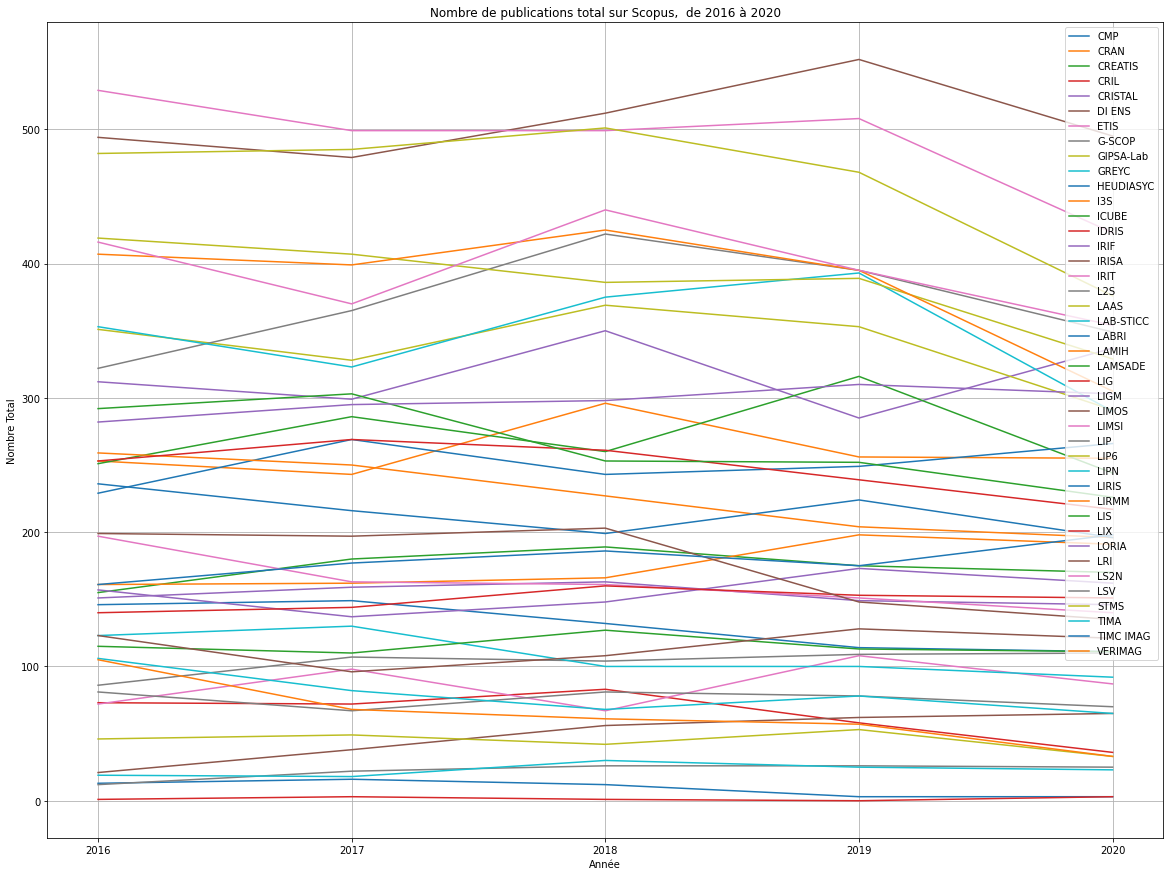

In [9]:
statsParAnneeLabo.groupby('Nom')['Total'].plot(title='Nombre de publications total sur Scopus,  de 2016 à 2020',figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre Total")
plt.legend()
plt.grid(True)

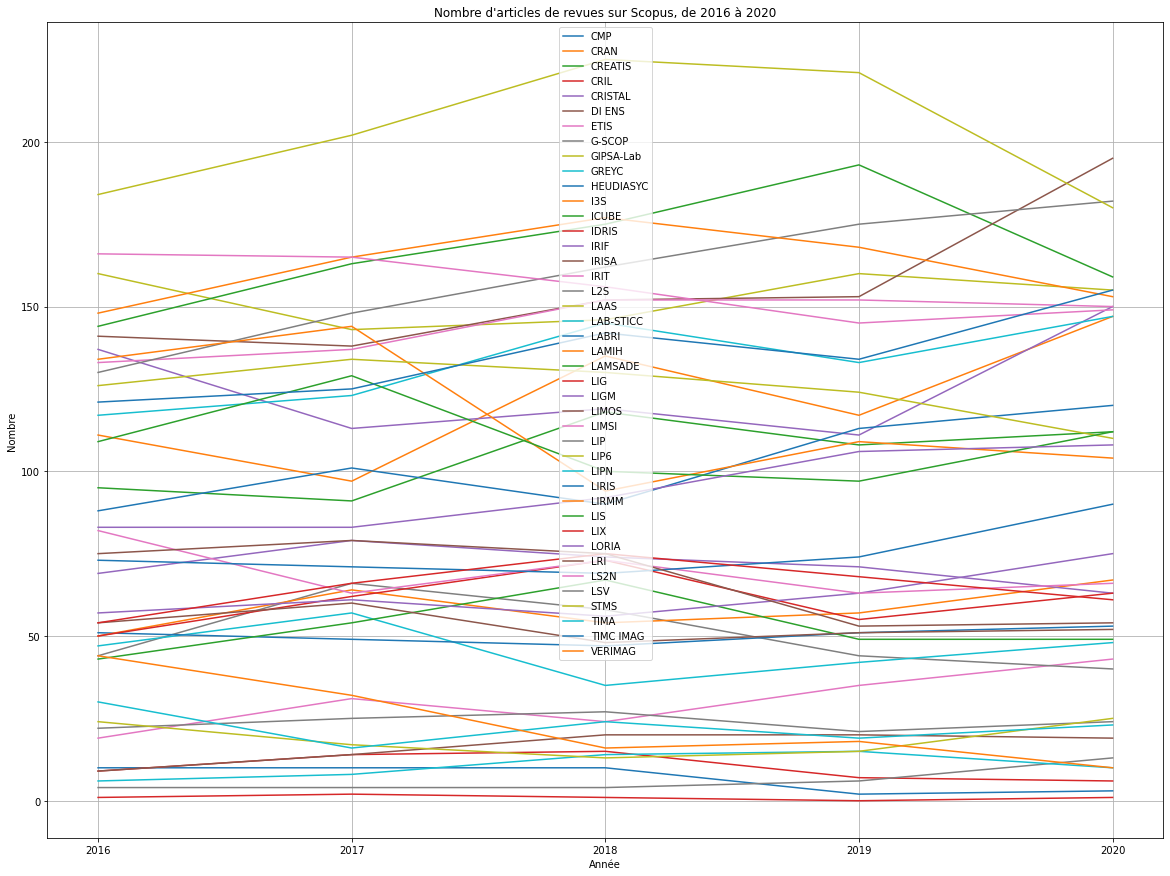

In [14]:
statsParAnneeLabo.groupby('Nom')['Article'].plot(title="Nombre d'articles de revues sur Scopus, de 2016 à 2020",figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre")
plt.legend()
plt.grid(True)

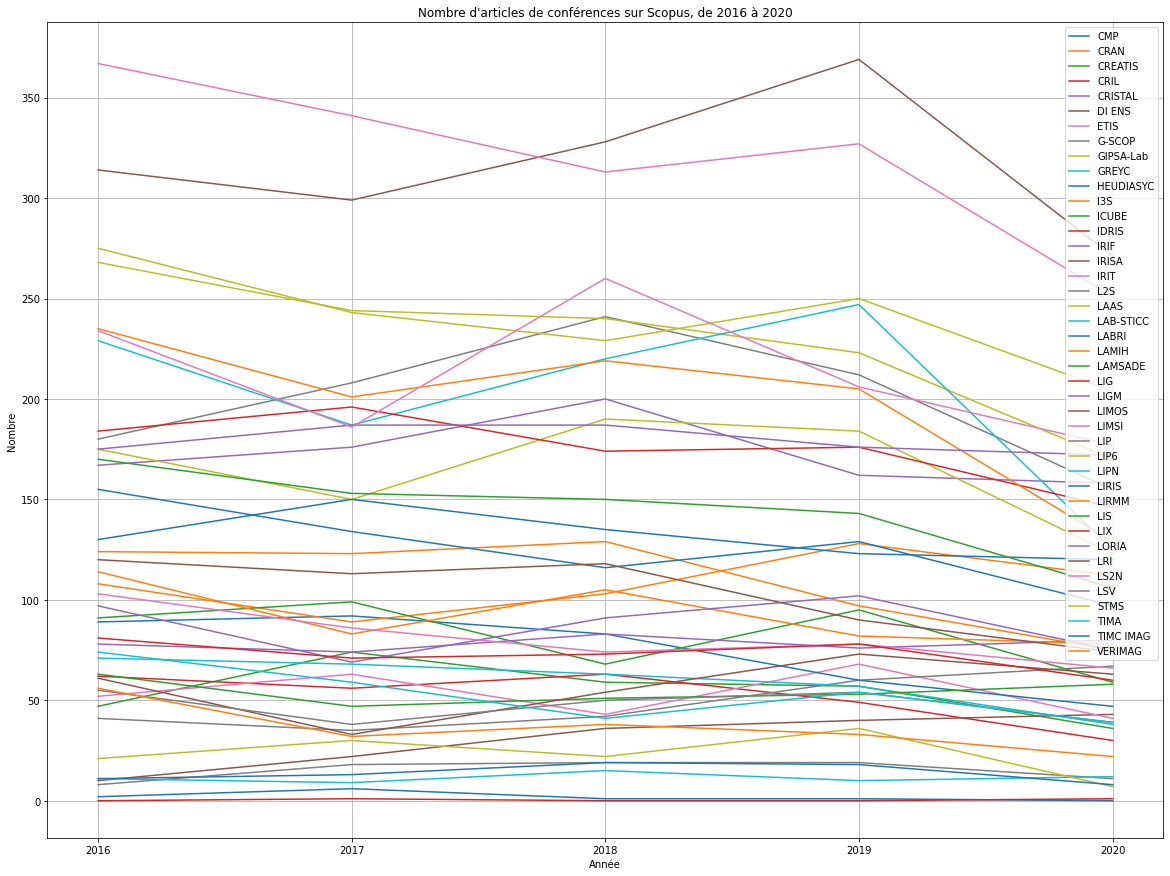

In [15]:
statsParAnneeLabo.groupby('Nom')['Conference Paper'].plot(title="Nombre d'articles de conférences sur Scopus, de 2016 à 2020",figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre")
plt.legend()
plt.grid(True)

In [16]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iTotalPubli = statsPourPivot.pivot(index="Nom", columns=["Année"], values='Total')
display(ins2iTotalPubli)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,13,16,12,3,3
CRAN,253,243,296,256,255
CREATIS,155,180,189,175,170
CRIL,73,72,83,58,36
CRISTAL,312,299,350,285,337
DI ENS,21,38,56,62,65
ETIS,72,98,67,108,87
G-SCOP,86,107,104,109,110
GIPSA-Lab,351,328,369,353,291


In [17]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iNbART = statsPourPivot.pivot(index="Nom", columns=["Année"], values='Article')
display(ins2iNbART)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,10,10,10,2,3
CRAN,111,97,135,117,147
CREATIS,95,91,118,108,112
CRIL,9,14,15,7,6
CRISTAL,137,113,119,111,150
DI ENS,9,14,20,20,19
ETIS,19,31,24,35,43
G-SCOP,44,66,58,44,40
GIPSA-Lab,160,143,146,160,155


In [18]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iNbART = statsPourPivot.pivot(index="Nom", columns=["Année"], values='Conference Paper')
display(ins2iNbART)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,2,6,1,1,0
CRAN,124,123,129,97,75
CREATIS,47,74,59,57,36
CRIL,62,56,63,49,30
CRISTAL,167,176,200,162,158
DI ENS,10,22,36,40,43
ETIS,52,63,43,68,41
G-SCOP,41,35,42,60,67
GIPSA-Lab,175,150,190,184,123


In [19]:
ins2i = statsParAnneeLabo.groupby('Année').sum()
display(ins2i)

,Total,Article,Conference Paper,Data Paper,Book,Book Chapter,Editorial,Erratum,Letter,Review,Short Survey,Note,Retracted
Année,,,,,,,,,,,,,
2016,8603,3254,4908,0,9,172,134,5,22,73,17,9,0
2017,8529,3405,4558,2,6,248,147,11,22,98,16,13,3
2018,8790,3482,4745,2,13,229,154,11,17,118,12,6,1
2019,8617,3418,4700,2,8,182,141,18,23,101,16,8,0
2020,7733,3546,3645,4,4,176,116,29,28,152,17,15,1


Text(0, 0.5, 'Nombre total')

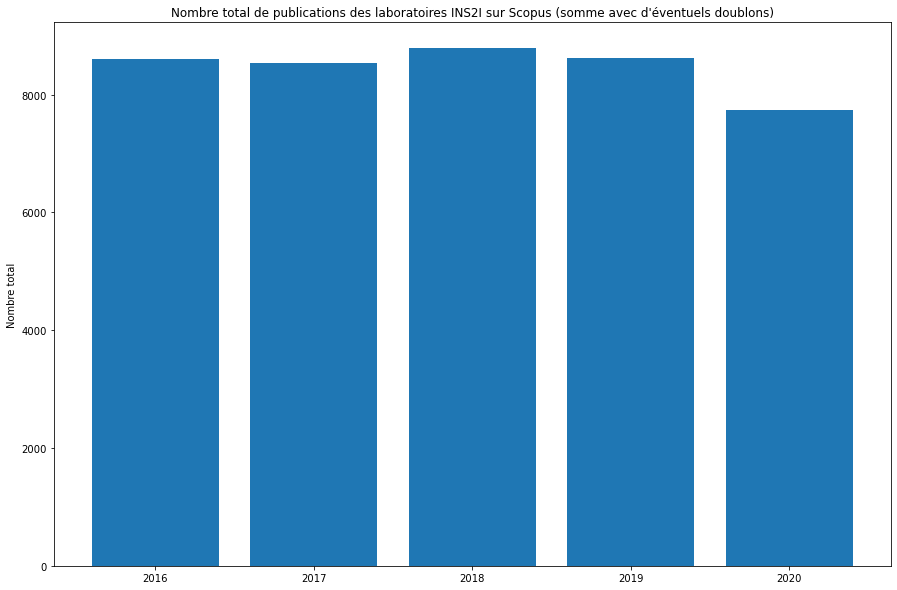

In [20]:
plt.figure(figsize=(15,10))
plt.bar(ins2i.index,ins2i['Total'])
plt.title("Nombre total de publications des laboratoires INS2I sur Scopus (somme avec d'éventuels doublons)")
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre total")

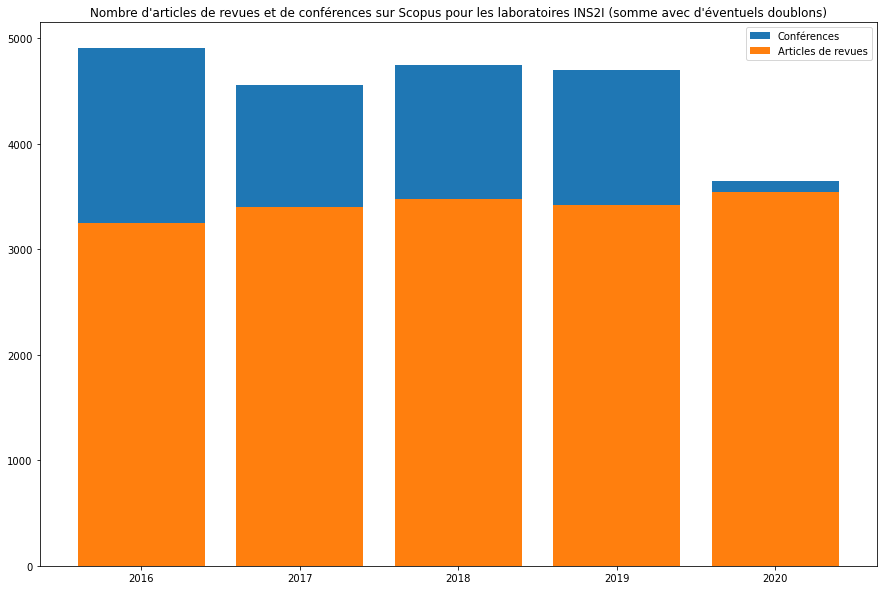

In [22]:
plt.figure(figsize=(15,10))
plt.title("Nombre d'articles de revues et de conférences sur Scopus pour les laboratoires INS2I (somme avec d'éventuels doublons)")
b1 = plt.bar(ins2i.index,ins2i['Conference Paper'])
b2 = plt.bar(ins2i.index,ins2i['Article'])
plt.legend([b1,b2], ['Conférences','Articles de revues'])

In [7]:
from pybliometrics.scopus import AuthorRetrieval
ab = au2 = AuthorRetrieval("Bellot")
ab.h_index

Scopus401Error: The requestor is not authorized to access the requested view or fields of the resource

In [10]:
s = ScopusSearch('ISSN(1532-849X) AND PUBYEAR IS 2010',subscriber=False)
print(s.results)

Scopus401Error: The requestor is not authorized to access the requested view or fields of the resource